# Bigrams
Modified START and END

In [1]:
import torch

In [2]:
from matplotlib import pyplot as plt

## 1. Data Gathering

In [3]:
words = open('data/names.txt', 'r').read().splitlines()

In [4]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

## 2. Data Pre-Processing

In [6]:
START = END = '.'

In [30]:
CHARS = sorted(list(set(''.join(words))) + [START])
CHARS

['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [24]:
# string/char to idx
stoi = {char:idx for idx, char in enumerate(CHARS)}
itos = {i:s for s, i in stoi.items()}

In [25]:
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [26]:
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

### 2.1 Generate word to context Matrix for biGrams

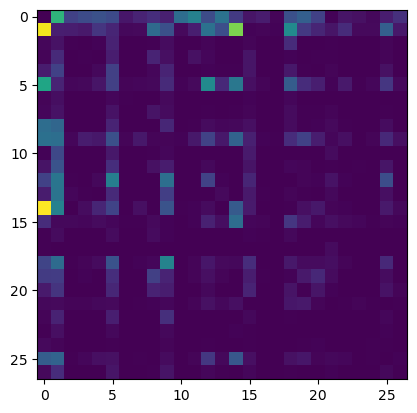

In [27]:
N = torch.zeros((len(CHARS), len(CHARS)))

for word in words:
    chars = [START] + list(word) + [END]
    for ch1, ch2 in zip(chars, chars[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        
plt.imshow(N)

In [51]:
def plot_matrix(N, float_prec=0):
    plt.figure(figsize=(16, 16))
    plt.imshow(N, cmap='Blues')
    for i in range(len(CHARS)):
        for j in range(len(CHARS)):
            chstr = f"{itos[i]}{itos[j]}"
            plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
            plt.text(j, i, f"{N[i, j].item():.{float_prec}f}", ha="center", va="top", color="gray")
    plt.axis('off')

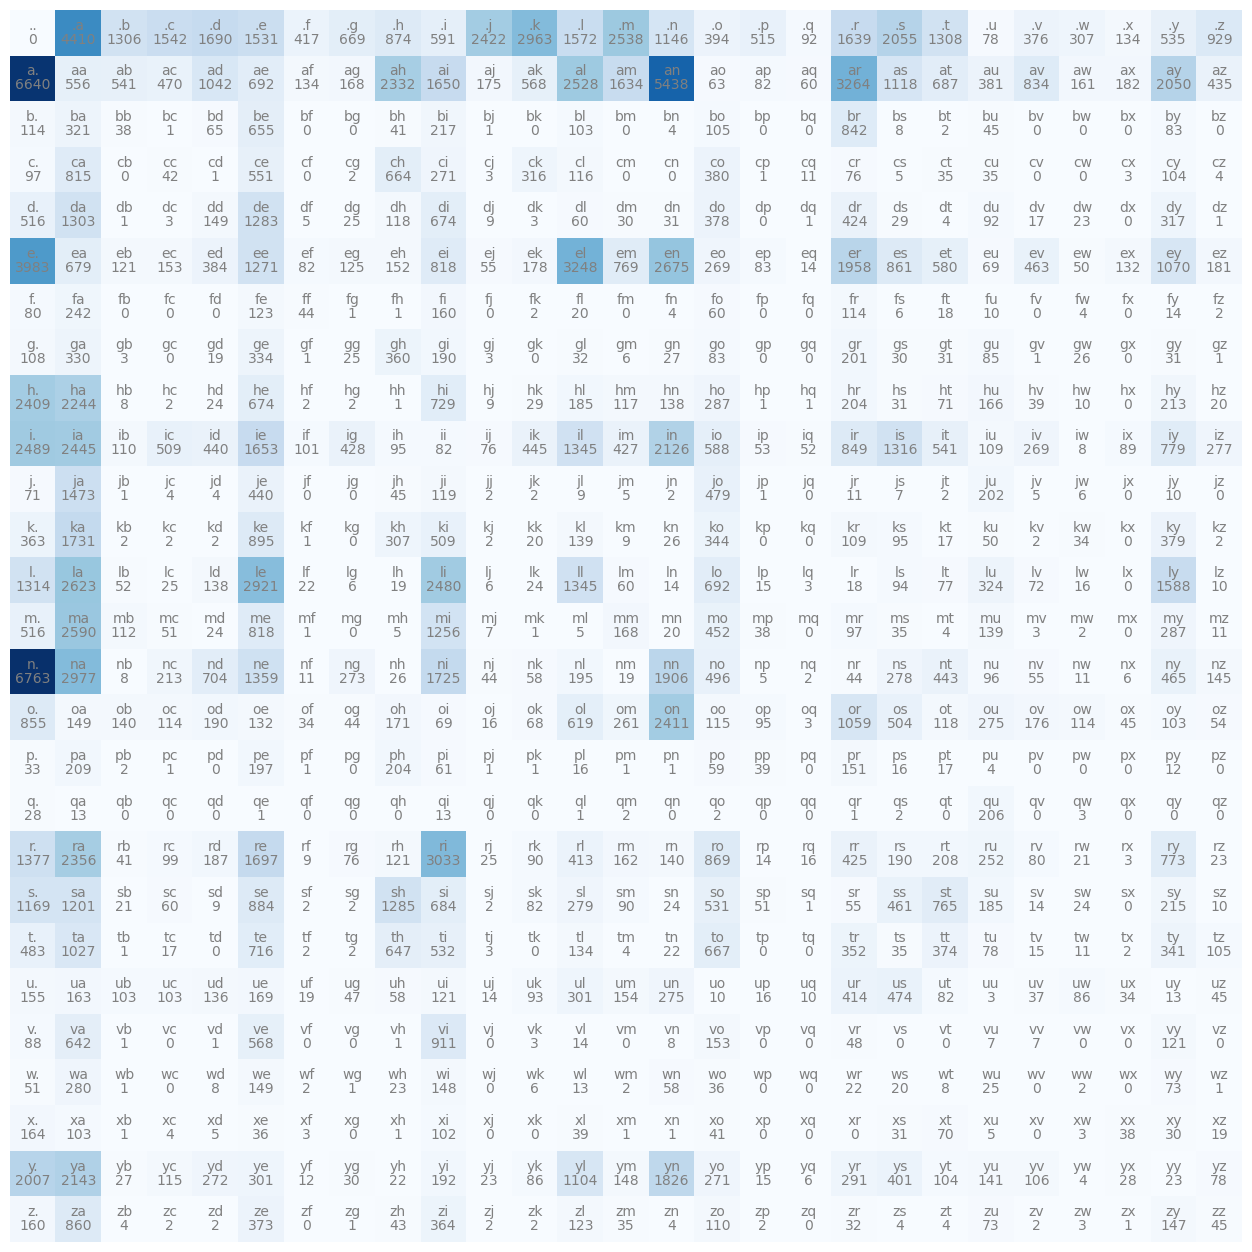

In [52]:
plot_matrix(N=N)

### 2.2 Convert to Probability Matrix

In [49]:
P = N / N.sum(dim=1, keepdims=True)

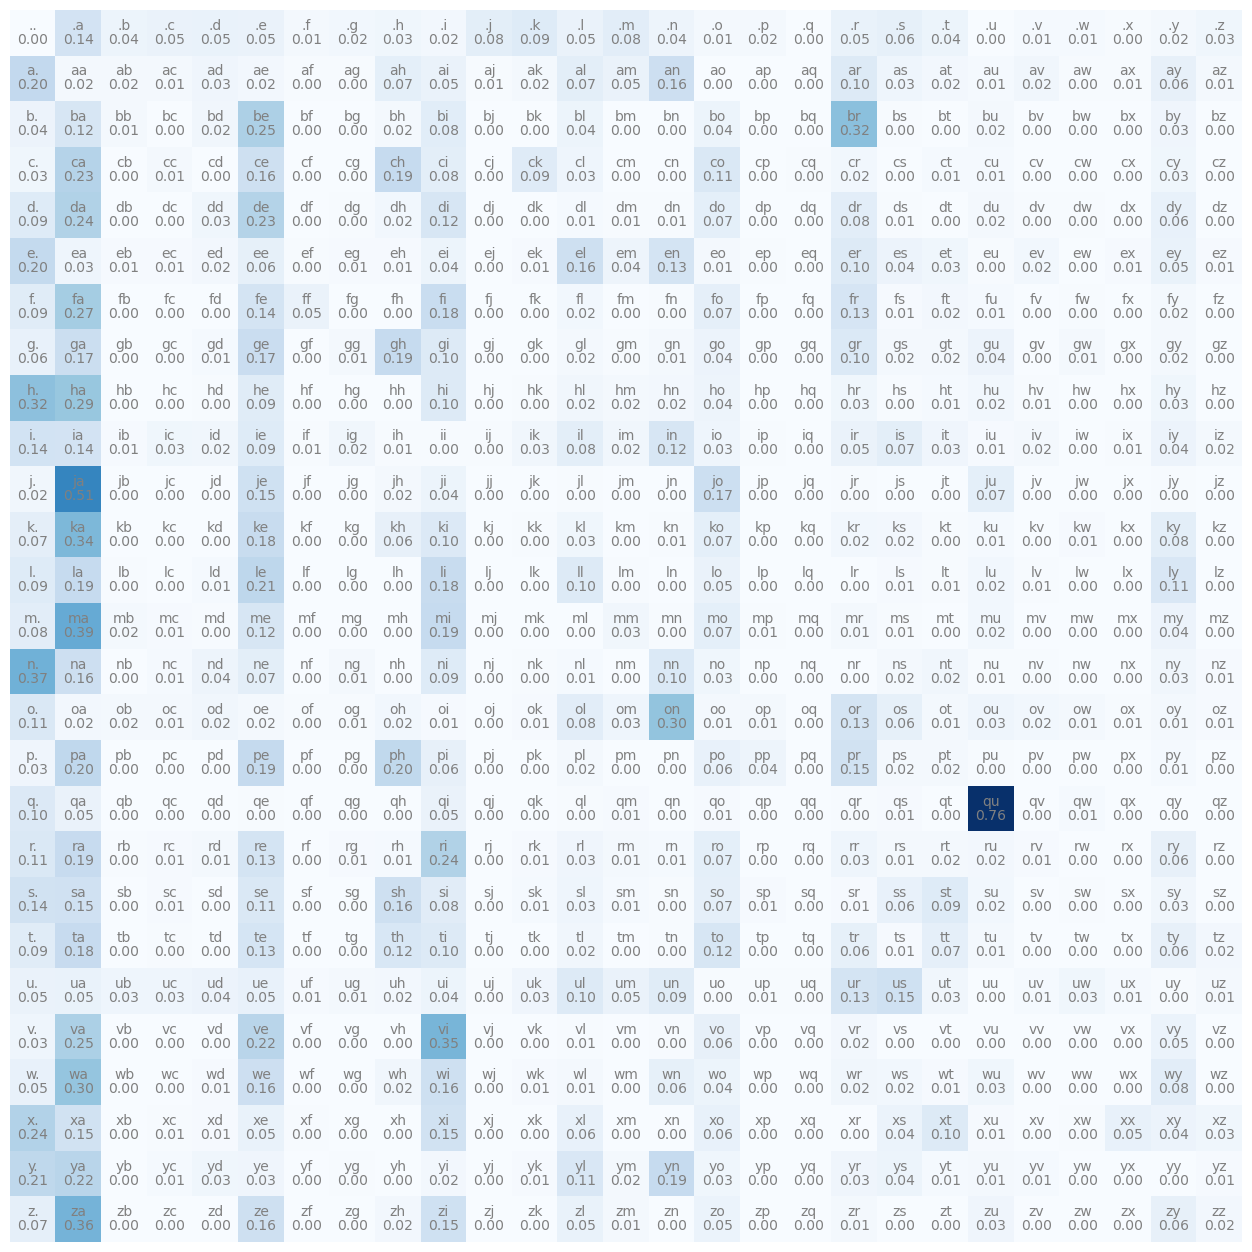

In [53]:
plot_matrix(N=P, float_prec=2)

## 3. Generate next word

In [60]:
P[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [63]:
# random idx for each word, which results in a random context

g = torch.Generator().manual_seed(4744)
ix = torch.multinomial(P[0], num_samples=1, replacement=True, generator=g).item()

7

In [80]:
g = torch.Generator().manual_seed(4744)


def gen_word():
    ix = 0
    new_word = ''
    while True:
        ix = torch.multinomial(P[ix], num_samples=1, replacement=True, generator=g).item()
        new_word += itos[ix]
        if ix == 0:
            break
    return new_word

gen_word()

'gyushuliorah.'

In [81]:
new_words = list()

for i in range(20):
    new_words.append(gen_word())
    
new_words

['ariy.',
 'armye.',
 'sshor.',
 'ka.',
 'e.',
 'aha.',
 'll.',
 'slladelayarta.',
 'jall.',
 'mrayl.',
 'thahe.',
 'dylaaryaloladah.',
 'ariamiziavererilinary.',
 'jsscajeybre.',
 'eeebe.',
 'zalle.',
 'rynn.',
 'bolth.',
 'zeyn.',
 'he.']

## 4. Quality of Model : neg log likelihood

In [115]:
def get_log_likelihood(words, debug=False):
    log_likelihood = 0.0
    n = 0
    for word in words:
        chars = [START] + list(word) + [END]
        for ch1, ch2 in zip(chars, chars[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            p = P[ix1, ix2]
            log_p = torch.log(p)
            if debug: print(f"{ch1}{ch2} {p:.4f} {log_p:.4f}")
            log_likelihood += log_p
            n += 1
            
    print(f"{log_likelihood=}")
    print(f"{-log_likelihood/n=}")
    
    return -log_likelihood/n

In [116]:
nll = get_log_likelihood(words=words)

log_likelihood=tensor(-559891.7500)
-log_likelihood/n=tensor(2.4541)


### 4.1 inf log liklihood for unseen tokens

In [119]:
nll = get_log_likelihood(words=["mafds"], debug=True)

.m 0.0792 -2.5354
ma 0.3899 -0.9418
af 0.0040 -5.5329
fd 0.0000 -inf
ds 0.0053 -5.2445
s. 0.1442 -1.9365
log_likelihood=tensor(-inf)
-log_likelihood/n=tensor(inf)


We need to do smoothing